In [102]:
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/MyDrive/Colab Notebooks/NIAS/Dados/titanic'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

seed = np.random.seed(0)

In [104]:
df_test = pd.read_csv(f'{path}/test.csv')
df_train = pd.read_csv(f'{path}/train.csv')

In [105]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [106]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [107]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [108]:
df_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [109]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [110]:
df_train_numeric = df_train[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare']]

In [111]:
df_test_numeric = df_test[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch',
        'Fare']]

In [112]:
df_train_numeric = df_train_numeric.dropna(subset=['Age'])

In [113]:
df_test_numeric = df_test_numeric.fillna(0.0)

In [117]:
rotulos = ["0 - 10", "10 - 20", "20 - 30", "30 - 40", "40 - 50", "50 - 60", "60 - 70", "70 - 80"]
df_train_numeric.loc[:,"Intervalo de Idades"] = pd.cut(df_train_numeric['Age'], bins=8, labels=rotulos)

/tmp/ipython-input-3755182348.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_graph_interval = df_train_numeric.groupby('Intervalo de Idades')['Survived'].sum().reset_index()


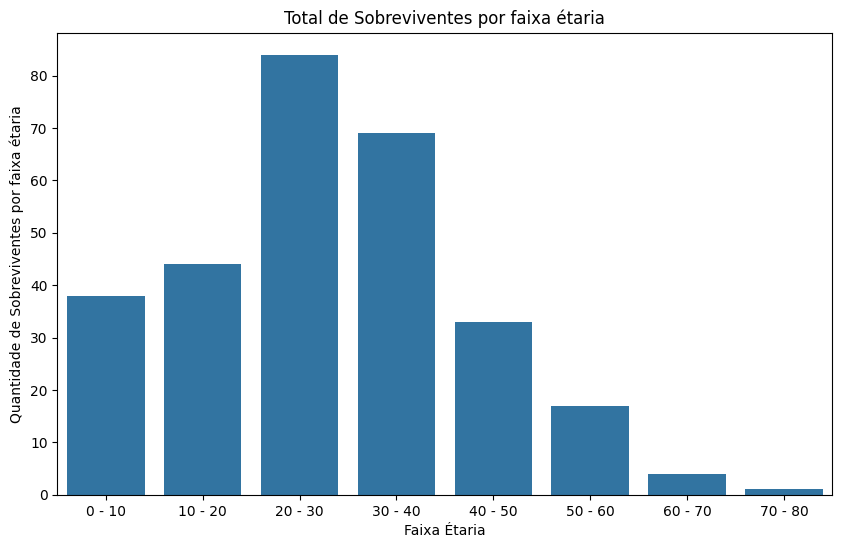

In [121]:
df_graph_interval = df_train_numeric.groupby('Intervalo de Idades')['Survived'].sum().reset_index()

plt.figure(figsize=(10,6))

sns.barplot(
    x = df_graph_interval['Intervalo de Idades'],
    y = df_graph_interval['Survived'],
    data=df_graph_interval
)

plt.title("Total de Sobreviventes por faixa étaria")
plt.xlabel("Faixa Étaria")
plt.ylabel("Quantidade de Sobreviventes por faixa étaria")
plt.show()

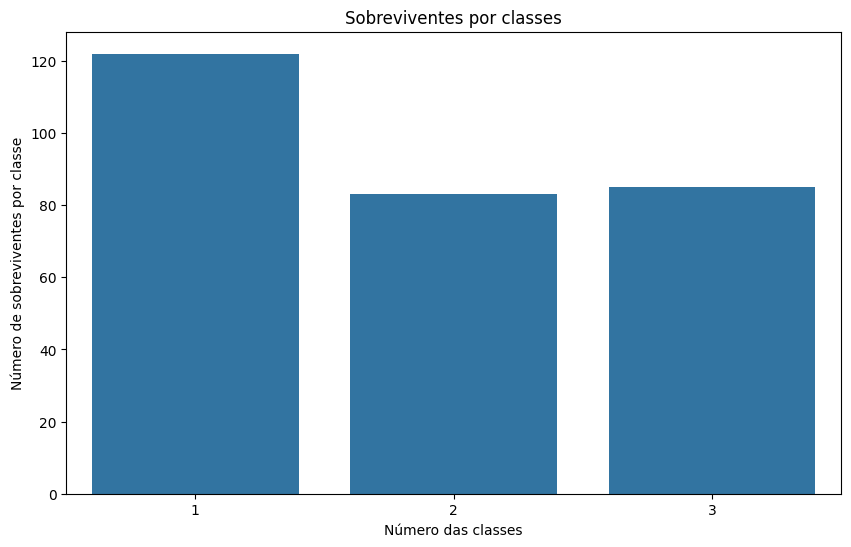

In [128]:
df_graph_class = df_train_numeric.groupby('Pclass')['Survived'].sum().reset_index()

plt.figure(figsize=(10,6))

sns.barplot(
    x = df_graph_class['Pclass'],
    y = df_graph_class['Survived'],
    data=df_graph_class
)

plt.title("Sobreviventes por classes")
plt.xlabel("Número das classes")
plt.ylabel("Número de sobreviventes por classe")
plt.show()

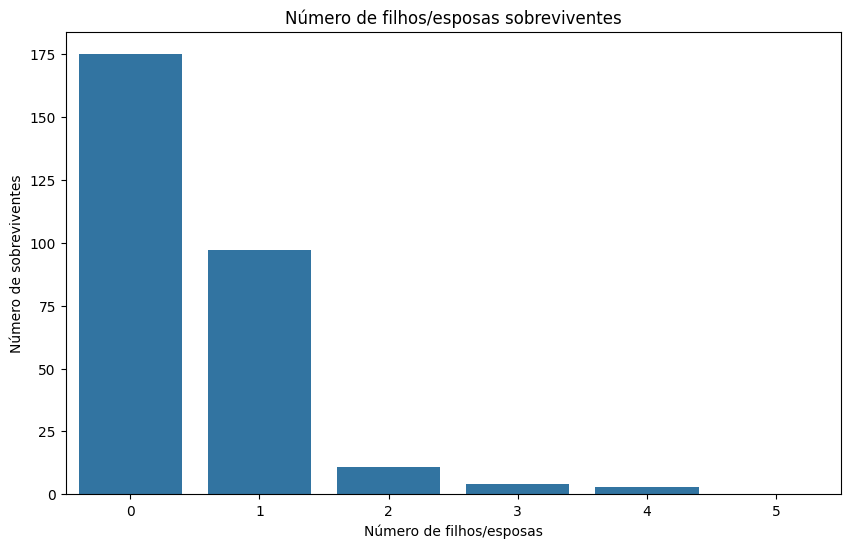

In [137]:
df_graph_siblings = df_train_numeric.groupby('SibSp')['Survived'].sum().reset_index()

plt.figure(figsize=(10,6))

sns.barplot(
    x=df_graph_siblings['SibSp'],
    y=df_graph_siblings['Survived'],
    data=df_graph_siblings
)

plt.title("Número de filhos/esposas sobreviventes")
plt.xlabel("Número de filhos/esposas")
plt.ylabel("Número de sobreviventes")
plt.show()

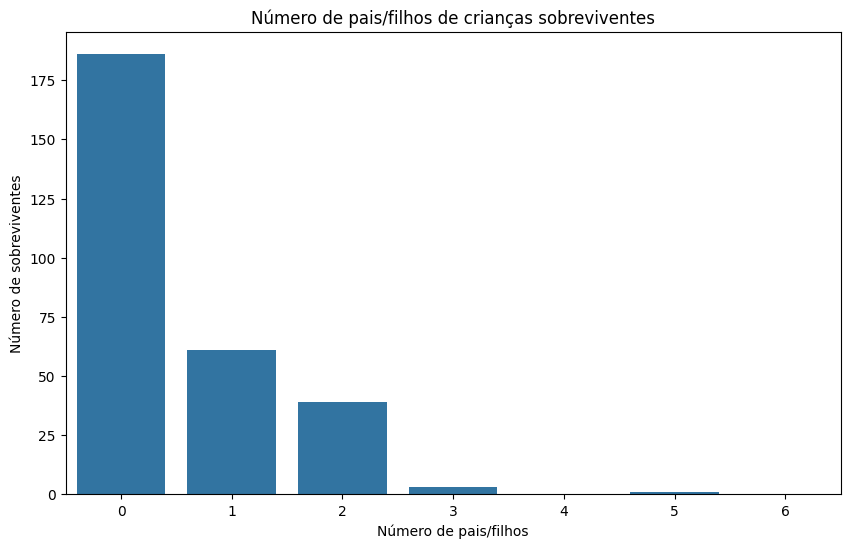

In [138]:
df_graph_parents = df_train_numeric.groupby("Parch")['Survived'].sum().reset_index()

plt.figure(figsize=(10,6))

sns.barplot(
    x = df_graph_parents["Parch"],
    y = df_graph_parents["Survived"],
    data=df_graph_parents
)

plt.title("Número de pais/filhos de crianças sobreviventes")
plt.xlabel("Número de pais/filhos")
plt.ylabel("Número de sobreviventes")
plt.show()